### Japanese Automotive Trade: Decade Overview
Posted on December 31, 2016 by BRYAN NOVY

How has the Japanese Automotive industry fared on the global scale over the last decade? This article will take a look at the industry from 2006 to 2015, to see how it has grown and how it weathered rough periods such as the 2008 financial crisis and the 2011 East Japan Earthquake.

Japan is the world’s third largest economy and is still largely a heavy manufacturing and export oriented country. The automotive industry is one of Japan’s most important industries, generating hundreds of billions of dollars in trade every year. How has this critically important industry fared over the last ten  years in the face of two monumental catastrophes? This article will examine the trade flows of two Japanese automotive commodities, finished vehicles and spare parts. The UN publishes trade data for Japan and most other nations on its Comtrade database. This is the source for the data in this article.

In [75]:
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [76]:
from pandas import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Collect the Data

Download data from UN COMTRADE website. We need two csv files here because the COMTRADE site only allows you to aggregate a total of 5 years.

To access this data:

go to https://comtrade.un.org/ then select 'get trade data'

select ‘type of product: goods’,

‘frequency: annual’,

‘periods: 2006 2007 2008 2009 2010’,

‘reporter: Japan’,

‘partners: world’,

‘flows: imports and exports’,

‘HS (as reported) commodity codes: 8703, Motor Vehicles. 8708, Parts and Accessories for Motor Vehicles.’

Select the ‘Download CSV ‘ option to download the data set.

Clicking on ‘Preview’ results in a message that the data exceeds 500 rows.

Data was downloaded using the Download CSV button and the download file renamed appropriately.

Repeat same process for second half of decade

select ‘type of product: goods’,

‘frequency: annual’,

‘periods: 2011 2012 2013 2014 2015’,

‘reporter: Japan’,

‘partners: world’,

‘flows: imports and exports’,

‘HS (as reported) commodity codes:8703, Motor Vehicles. 8708, Parts and Accessories for Motor Vehicles. ’

Select the ‘Download CSV ‘ option to download the data set.

In [77]:
Location1 = 'Jpnauto06.csv'

In [78]:
Location2 = 'Jpnauto11.csv'

In [79]:
auto1 = read_csv(Location1, dtype={'Commodity Code':str})

In [80]:
auto1.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H3,2007,2007,2007,4,0,1,Import,392,Japan,...,NaN,NaN,294923,NaN,6.130260e+08,NaN,7692665435,NaN,NaN,4
1,H3,2007,2007,2007,4,0,2,Export,392,Japan,...,NaN,NaN,7210028,NaN,8.648619e+09,NaN,108147196560,NaN,NaN,4
2,H3,2008,2008,2008,4,0,1,Import,392,Japan,...,NaN,NaN,232478,NaN,5.272526e+08,NaN,6796330546,NaN,NaN,4
3,H3,2008,2008,2008,4,0,2,Export,392,Japan,...,NaN,NaN,7210669,NaN,NaN,NaN,115440406399,NaN,NaN,2
4,H3,2009,2009,2009,4,0,1,Import,392,Japan,...,NaN,NaN,147002,NaN,3.604418e+08,NaN,4583680470,NaN,NaN,4


In [81]:
auto2 = read_csv(Location2, dtype={'Commodity Code':str})

In [82]:
auto2.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2012,2012,2012,4,0,1,Import,392,Japan,...,NaN,NaN,335762,NaN,906160184,NaN,10892791305,NaN,NaN,4
1,H4,2012,2012,2012,4,0,2,Export,392,Japan,...,NaN,NaN,5030530,NaN,6767778928,NaN,97460125845,NaN,NaN,6
2,H4,2013,2013,2013,4,0,1,Import,392,Japan,...,NaN,NaN,346189,NaN,881393897,NaN,10608658988,NaN,NaN,4
3,H4,2013,2013,2013,4,0,2,Export,392,Japan,...,NaN,NaN,4967486,NaN,6419213011,NaN,91688812208,NaN,NaN,6
4,H4,2014,2014,2014,4,0,1,Import,392,Japan,...,NaN,NaN,338339,NaN,806590102,NaN,10402593438,NaN,NaN,4


In [83]:
COLUMNS = ['Year', 'Period', 'Trade Flow', 'Reporter', 'Partner', 'Commodity', 'Commodity Code', 'Trade Value (US$)']
auto1 = auto1[COLUMNS]
auto2 = auto2[COLUMNS]


In [84]:
auto1.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2007,2007,Import,Japan,World,Motor cars and other motor vehicles principall...,8703,7692665435
1,2007,2007,Export,Japan,World,Motor cars and other motor vehicles principall...,8703,108147196560
2,2008,2008,Import,Japan,World,Motor cars and other motor vehicles principall...,8703,6796330546
3,2008,2008,Export,Japan,World,Motor cars and other motor vehicles principall...,8703,115440406399
4,2009,2009,Import,Japan,World,Motor cars and other motor vehicles principall...,8703,4583680470


In [85]:
auto2.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2012,2012,Import,Japan,World,Vehicles other than railway or tramway rolling...,8703,10892791305
1,2012,2012,Export,Japan,World,Vehicles other than railway or tramway rolling...,8703,97460125845
2,2013,2013,Import,Japan,World,Vehicles other than railway or tramway rolling...,8703,10608658988
3,2013,2013,Export,Japan,World,Vehicles other than railway or tramway rolling...,8703,91688812208
4,2014,2014,Import,Japan,World,Vehicles other than railway or tramway rolling...,8703,10402593438


In [86]:
auto_world1 = auto1[auto1['Partner'] == 'World']
auto_world2 = auto2[auto2['Partner'] == 'World']


In [87]:
def autoType(code):
    if code == '8703':
        return 'Automobile'
    if code == '8708':
        return 'Parts'
    else:
        return 'unkown'
    
COMMODITY = 'Commodity'
auto1[COMMODITY] = auto1['Commodity Code'].apply(autoType)
auto2[COMMODITY] = auto2['Commodity Code'].apply(autoType)

YEAR = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
#index?
headings = [YEAR, PARTNER, FLOW, COMMODITY, VALUE]
auto1 = auto1[headings]
auto2 = auto2[headings]


In [88]:
auto1.head()

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2007,World,Import,Automobile,7692665435
1,2007,World,Export,Automobile,108147196560
2,2008,World,Import,Automobile,6796330546
3,2008,World,Export,Automobile,115440406399
4,2009,World,Import,Automobile,4583680470


In [89]:
auto2.head()

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2012,World,Import,Automobile,10892791305
1,2012,World,Export,Automobile,97460125845
2,2013,World,Import,Automobile,10608658988
3,2013,World,Export,Automobile,91688812208
4,2014,World,Import,Automobile,10402593438


In [90]:
#Concatenate 

In [91]:
auto2.index = range(20,40)
auto2

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
20,2012,World,Import,Automobile,10892791305
21,2012,World,Export,Automobile,97460125845
22,2013,World,Import,Automobile,10608658988
23,2013,World,Export,Automobile,91688812208
24,2014,World,Import,Automobile,10402593438
25,2014,World,Export,Automobile,88542760252
26,2015,World,Import,Automobile,8984723373
27,2015,World,Export,Automobile,86047057153
28,2012,World,Import,Parts,6932089821
29,2012,World,Export,Parts,39781759248


In [92]:
frames = [auto1, auto2]

In [93]:
result_cat = pd.concat(frames)
result_cat

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2007,World,Import,Automobile,7692665435
1,2007,World,Export,Automobile,108147196560
2,2008,World,Import,Automobile,6796330546
3,2008,World,Export,Automobile,115440406399
4,2009,World,Import,Automobile,4583680470
5,2009,World,Export,Automobile,62268308398
6,2010,World,Import,Automobile,6443056569
7,2010,World,Export,Automobile,90372819884
8,2007,World,Import,Parts,5334488722
9,2007,World,Export,Parts,28429337844


In [94]:
result_year = result_cat.sort(YEAR)
result_year

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
19,2006,World,Export,Parts,25867218155
18,2006,World,Import,Parts,4495015969
17,2006,World,Export,Automobile,94485251611
16,2006,World,Import,Automobile,7654017135
9,2007,World,Export,Parts,28429337844
8,2007,World,Import,Parts,5334488722
0,2007,World,Import,Automobile,7692665435
1,2007,World,Export,Automobile,108147196560
10,2008,World,Import,Parts,6417650249
11,2008,World,Export,Parts,29431036226


In [95]:
new_auto = result_year.reset_index()
new_auto

,index,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,19,2006,World,Export,Parts,25867218155
1,18,2006,World,Import,Parts,4495015969
2,17,2006,World,Export,Automobile,94485251611
3,16,2006,World,Import,Automobile,7654017135
4,9,2007,World,Export,Parts,28429337844
5,8,2007,World,Import,Parts,5334488722
6,0,2007,World,Import,Automobile,7692665435
7,1,2007,World,Export,Automobile,108147196560
8,10,2008,World,Import,Parts,6417650249
9,11,2008,World,Export,Parts,29431036226


In [96]:
new_auto = new_auto[headings]

In [97]:
new_auto

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2006,World,Export,Parts,25867218155
1,2006,World,Import,Parts,4495015969
2,2006,World,Export,Automobile,94485251611
3,2006,World,Import,Automobile,7654017135
4,2007,World,Export,Parts,28429337844
5,2007,World,Import,Parts,5334488722
6,2007,World,Import,Automobile,7692665435
7,2007,World,Export,Automobile,108147196560
8,2008,World,Import,Parts,6417650249
9,2008,World,Export,Parts,29431036226


### Total Automotive Trade Flow Over Last Decade

To look at the automotive trade balance, the data is split into two groups: exports from Japan and imports into Japan from 2006 to 2015. The values in these groups are added to get the total trade value, and we can use this to investigate trade balances.

In [98]:
grouped = new_auto.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Export    1238946167112
Import     143494677857
Name: Trade Value (US$), dtype: int64

In [99]:
1238946167112 - 143494677857

1095451489255

Trade Surplus of $1,095,451,489,255

### Japanese Automotive Imports

In [100]:
new_auto_world = new_auto[new_auto['Partner']=='World']

In [101]:
imports = new_auto_world[new_auto_world[FLOW] == 'Import']
grouped = imports.groupby([YEAR])
print('The Value of Automotive Imports to Japan per Year over the Last 10 Years:')
totalImports = grouped[VALUE].aggregate(sum)
totalImports

The Value of Automotive Imports to Japan per Year over the Last 10 Years:


Period
2006    12149033104
2007    13027154157
2008    13213980795
2009     8531909821
2010    12002032939
2011    14731597654
2012    17824881126
2013    17736102166
2014    18079923270
2015    16198062825
Name: Trade Value (US$), dtype: int64

Recession probably had an Effect

3-11 Earthquake had no Effect

Why did auto imports sky-rocket after 2009?

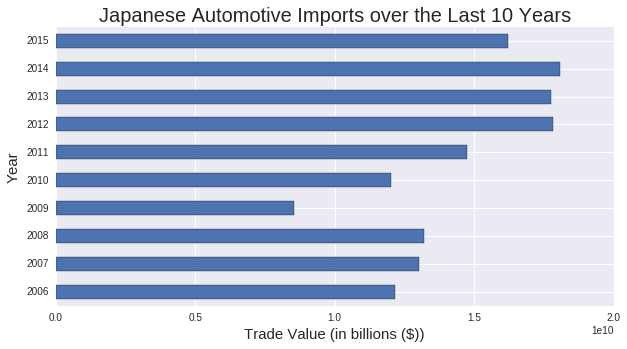

In [102]:
importPlot = totalImports.plot(kind = 'barh', figsize = (10,5))
importPlot.set_xlabel('Trade Value (in billions ($))', fontsize=15)
importPlot.set_title('Japanese Automotive Imports over the Last 10 Years', fontsize=20)
importPlot.set_ylabel('Year', fontsize=15)

### Japanese Automotive Exports

In [103]:
exports = new_auto_world[new_auto_world[FLOW] == 'Export']
grouped = exports.groupby([YEAR])
print('The Value of Automobile Exports from Japan per Year over the Last 10 Years:')
totalExports = grouped[VALUE].aggregate(sum)
totalExports

The Value of Automobile Exports from Japan per Year over the Last 10 Years:


Period
2006    120352469766
2007    136576534404
2008    144871442625
2009     86925469123
2010    125463686725
2011    124827078627
2012    137241885093
2013    126990040968
2014    121035744144
2015    114661815637
Name: Trade Value (US$), dtype: int64

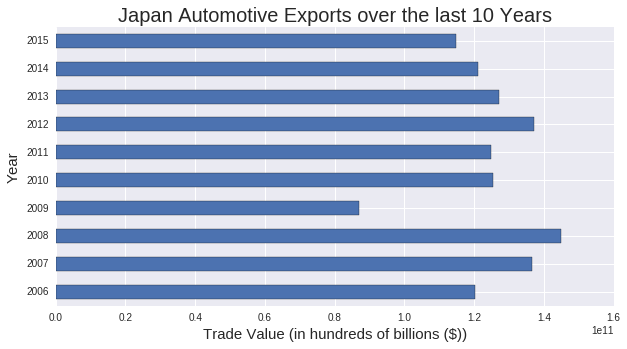

In [104]:
exportPlot = totalExports.plot(kind='barh',figsize=(10,5))
exportPlot.set_xlabel('Trade Value (in hundreds of billions ($))', fontsize =15)
exportPlot.set_title('Japan Automotive Exports over the last 10 Years', fontsize = 20)
exportPlot.set_ylabel('Year', fontsize=15)

Recession probably had an effect

3-11 had little to no effect

Is the decline in population correlated with the decline in auto exports?

### Automotive Trade Surplus per Year

In [105]:
surplus = totalExports - totalImports

In [106]:
print('The Value of the Japanese Automotive Trade Surplus per Year over the Last 10 Years:')
surplus

The Value of the Japanese Automotive Trade Surplus per Year over the Last 10 Years:


Period
2006    108203436662
2007    123549380247
2008    131657461830
2009     78393559302
2010    113461653786
2011    110095480973
2012    119417003967
2013    109253938802
2014    102955820874
2015     98463752812
Name: Trade Value (US$), dtype: int64

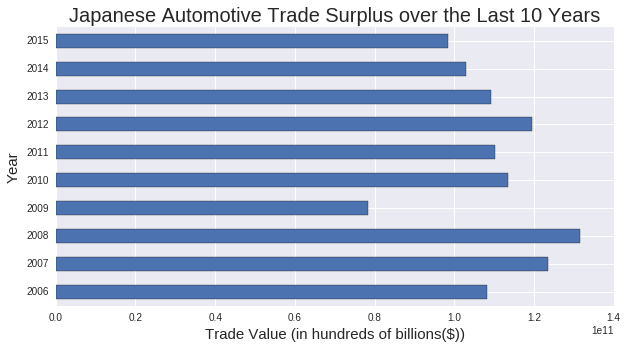

In [107]:
surplusPlot = surplus.plot(kind = 'barh', figsize=(10,5))
surplusPlot.set_xlabel('Trade Value (in hundreds of billions($))',fontsize=15)
surplusPlot.set_title('Japanese Automotive Trade Surplus over the Last 10 Years',fontsize=20)
surplusPlot.set_ylabel('Year',fontsize=15)

### Conclusions

The Japanese automotive industry from 2006 to 2015 was analysed in terms of trade value, income (exports) and goods (imports). Over this period, Japan enjoyed a trade surplus of over 1 trillion US dollars. 2008 was a stellar year for Japanese auto exports; they were 17% higher than 2006. Exports collapsed in 2009, however, with an enormous 40% drop in trade value.  Auto imports decreased nearly as bad in 2009, by about 36%. This was likely due to the 2008 financial crisis.
Exports bounced back by 2010, shooting up by 31%. Not quite 2008 levels, but still an impressive recovery. By 2011, imports started overtaking pre-2008 levels. As devastating as the 2011 East Japan Earthquake was, the auto industry seems to have not been affected by it much, if at all.

Both auto exports as well as imports continued to grow in the years after the earthquake. There was a huge surge in auto imports following the financial crisis. Imports in 2014 were about 28% higher than in 2008.

 From 2012 to 2015, Japanese auto exports saw a steady decline. Exports in 2015 were down 16.7% from 2012. The automotive trade surplus was down by 17.5% in that same period. This may be one effect of Japan’s population decline, where about one million workers are leaving the work force per year and are not being replaced, thus gradually lowering overall industrial productivity.

To sum up, the Japanese auto trade is a massive industry and crucial to the Japanese economy. It weathered both the 2008 financial crisis and the 2011 earthquake, but it may be undone by yet another looming catastrophe: the demographics crisis.